In [97]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [99]:
df = pd.read_csv("Mall_Customers.csv")

In [101]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [105]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [107]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [119]:
df["Cluster"] = kmeans.fit_predict(X)

cluster_summary = df.groupby("Cluster").mean(numeric_only=True)

# Add the count of each cluster
cluster_summary["Count"] = df["Cluster"].value_counts()


print(cluster_summary)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0             162.0  40.394737           87.000000               18.631579   
1             162.0  32.692308           86.538462               82.128205   
2              62.0  40.325203           44.154472               49.829268   

         Count  
Cluster         
0           38  
1           39  
2          123  


In [115]:
print(df.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


Cluster Summary:
          CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         86.320988  42.716049           55.296296               49.518519
1        162.000000  32.692308           86.538462               82.128205
2         23.090909  25.272727           25.727273               79.363636
3        164.371429  41.114286           88.200000               17.114286
4         23.000000  45.217391           26.304348               20.913043


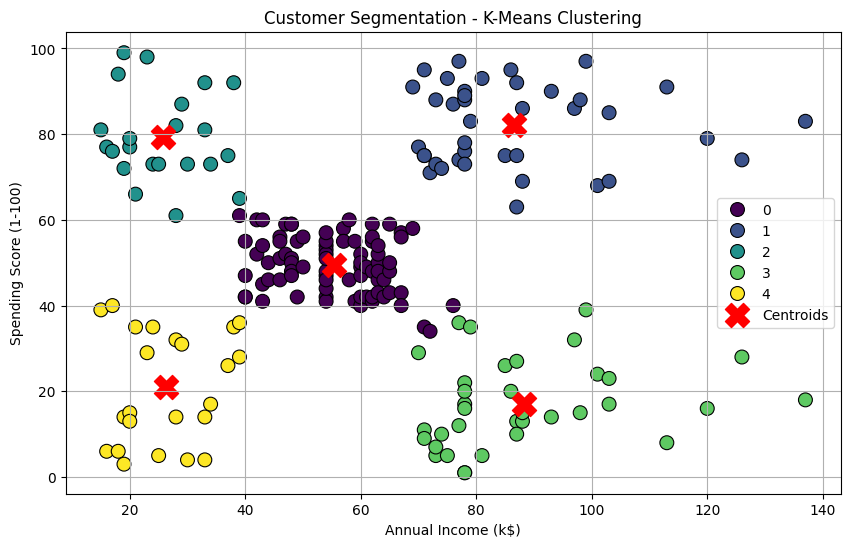


Cluster 0 Characteristics:
  - Average Income: 55.30k$
  - Average Spending Score: 49.52
  - Number of Customers: 81

Cluster 1 Characteristics:
  - Average Income: 86.54k$
  - Average Spending Score: 82.13
  - Number of Customers: 39

Cluster 2 Characteristics:
  - Average Income: 25.73k$
  - Average Spending Score: 79.36
  - Number of Customers: 22

Cluster 3 Characteristics:
  - Average Income: 88.20k$
  - Average Spending Score: 17.11
  - Number of Customers: 35

Cluster 4 Characteristics:
  - Average Income: 26.30k$
  - Average Spending Score: 20.91
  - Number of Customers: 23


In [129]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load and preprocess the dataset
df = pd.read_csv("Mall_Customers.csv")

# Selecting relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply K-Means clustering with the optimal K (from Elbow Method)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 3: Analyze cluster characteristics
cluster_summary = df.groupby("Cluster").mean(numeric_only=True)

print("Cluster Summary:\n", cluster_summary)

# Step 4: Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], 
                hue=df['Cluster'], palette='viridis', s=100, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0], 
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1], 
            c='red', marker='X', s=300, label="Centroids")
plt.title("Customer Segmentation - K-Means Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid()
plt.show()

# Step 5: Generate insights
for cluster in range(5):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster} Characteristics:")
    print(f"  - Average Income: {cluster_data['Annual Income (k$)'].mean():.2f}k$")
    print(f"  - Average Spending Score: {cluster_data['Spending Score (1-100)'].mean():.2f}")
    print(f"  - Number of Customers: {len(cluster_data)}")

